# Credit Origin

## 1.- EDA

In [1]:
import numpy as np
import pandas as pd 
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm
sns.set_style('whitegrid')

In [2]:
p_df_train = "C:/Users/braya/Documents/Python projects/Credit Origin/Data/application_train.csv"

In [3]:
df_train = pd.read_csv(p_df_train)
print(df_train.shape)
df_train.head()

(307511, 122)


,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


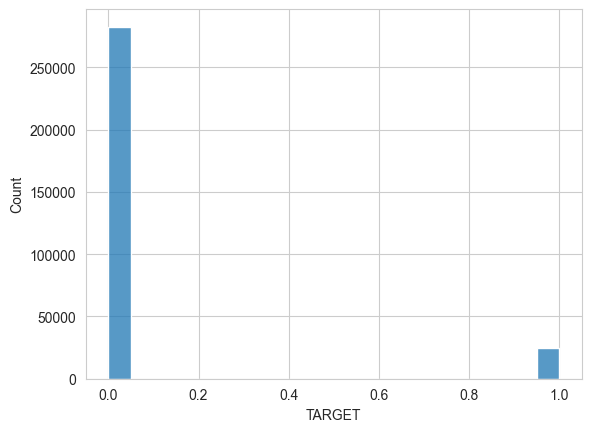

In [4]:
sns.histplot(data=df_train.TARGET);

<Axes: >

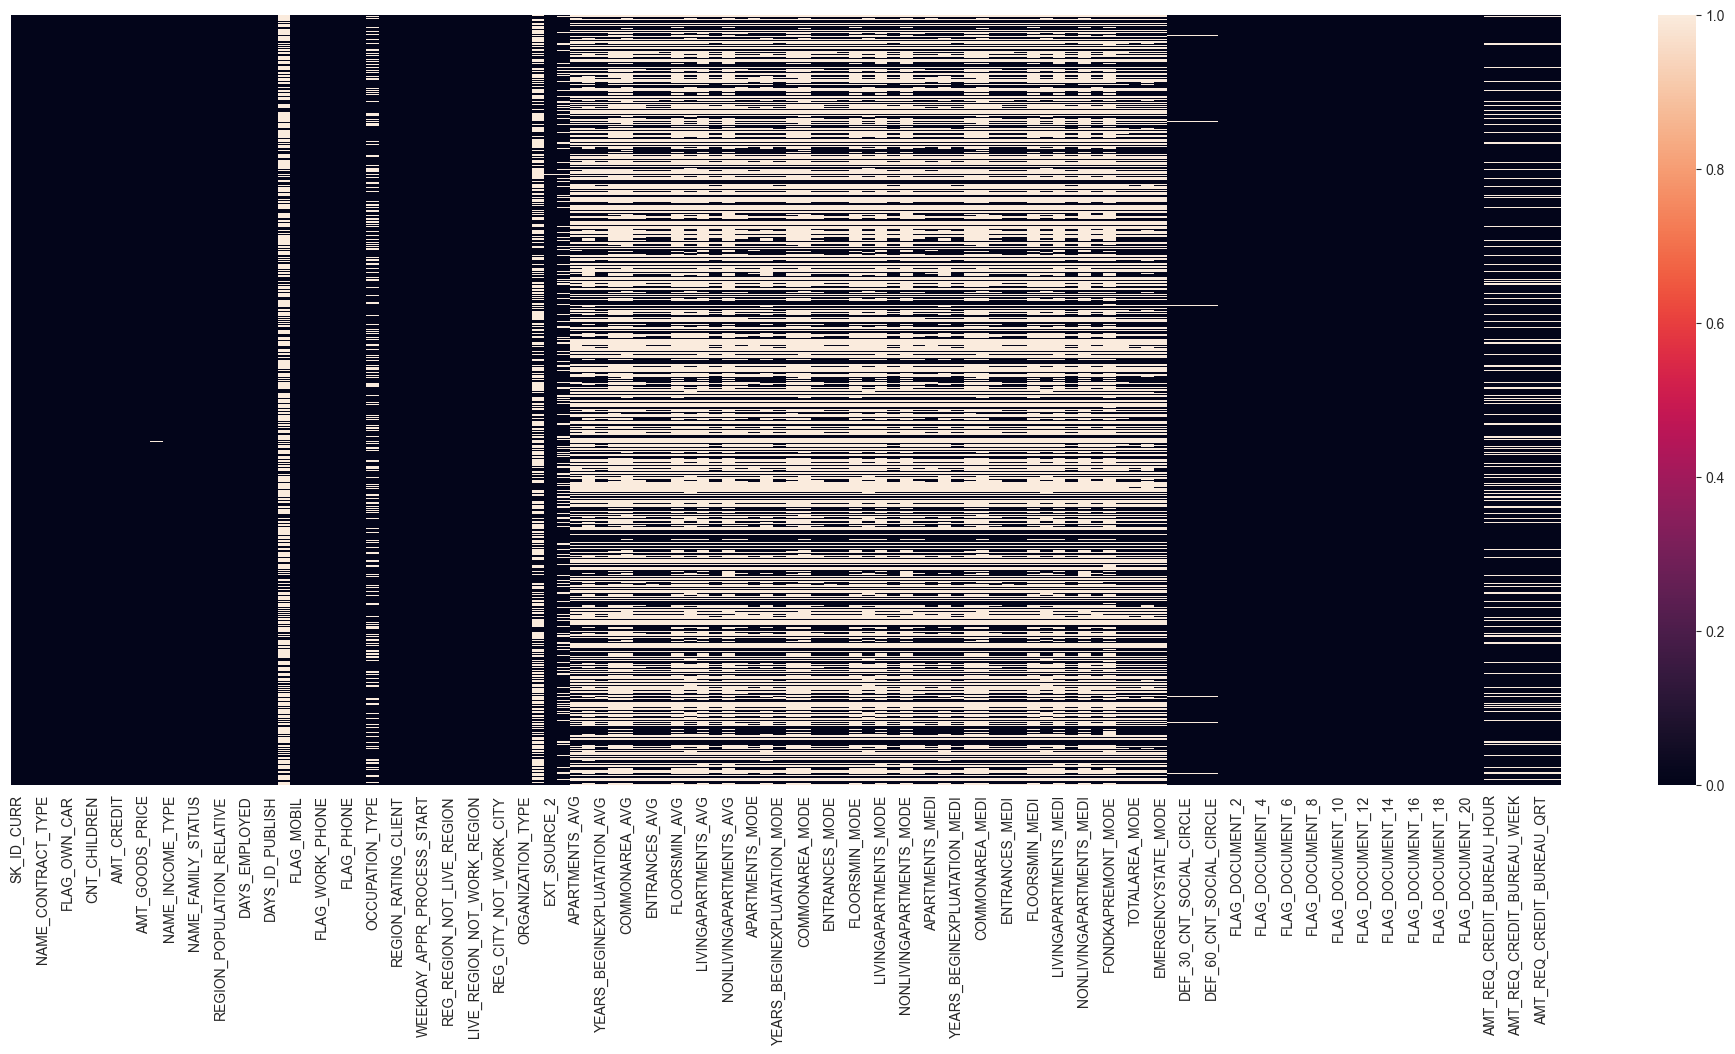

In [5]:
plt.figure(figsize = (25,10))
sns.heatmap(data = df_train.isnull(), yticklabels = False)

In [6]:
def missing_values(df):
        mis_val = df.isnull().sum()
        mis_val_percent = 100 * df.isnull().sum() / len(df)
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})
        
        # Sort the table by percentage of missing descending
        mis_val_table_ren_columns = mis_val_table_ren_columns[mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
        print ("Dataframe has " + str(df.shape[1]) + " columns,", str(mis_val_table_ren_columns.shape[0]) +
              " columns have missing values.")
        
        # Return the dataframe with missing information
        return mis_val_table_ren_columns

In [7]:
nan_values = missing_values(df_train)
nan_values.head(10)

Dataframe has 122 columns, 67 columns have missing values.


,Missing Values,% of Total Values
COMMONAREA_MEDI,214865,69.9
COMMONAREA_AVG,214865,69.9
COMMONAREA_MODE,214865,69.9
NONLIVINGAPARTMENTS_MEDI,213514,69.4
NONLIVINGAPARTMENTS_MODE,213514,69.4
NONLIVINGAPARTMENTS_AVG,213514,69.4
FONDKAPREMONT_MODE,210295,68.4
LIVINGAPARTMENTS_MODE,210199,68.4
LIVINGAPARTMENTS_MEDI,210199,68.4
LIVINGAPARTMENTS_AVG,210199,68.4


In [8]:
df_train.select_dtypes('object').apply(pd.Series.nunique, axis = 0)

NAME_CONTRACT_TYPE             2
CODE_GENDER                    3
FLAG_OWN_CAR                   2
FLAG_OWN_REALTY                2
NAME_TYPE_SUITE                7
NAME_INCOME_TYPE               8
NAME_EDUCATION_TYPE            5
NAME_FAMILY_STATUS             6
NAME_HOUSING_TYPE              6
OCCUPATION_TYPE               18
WEEKDAY_APPR_PROCESS_START     7
ORGANIZATION_TYPE             58
FONDKAPREMONT_MODE             4
HOUSETYPE_MODE                 3
WALLSMATERIAL_MODE             7
EMERGENCYSTATE_MODE            2
dtype: int64

## Encoding categorical variables

In [9]:
label = LabelEncoder()
label_count = 0

for col in df_train:
    if df_train[col].dtype == 'object':
        if len(list(df_train[col].unique())) <= 2:
            label.fit(df_train[col])
            df_train[col] = label.transform(df_train[col])
            label_count += 1
            
print(f'Columns encoded: {label_count}')

Columns encoded: 3


In [10]:
# one-hot encoding of categorical variables
df_train = pd.get_dummies(df_train)
print(f'Train: {df_train.shape}')

Train: (307511, 243)


In [11]:
train_labels = df_train.TARGET
df_train.describe()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,HOUSETYPE_MODE_terraced house,WALLSMATERIAL_MODE_Block,WALLSMATERIAL_MODE_Mixed,WALLSMATERIAL_MODE_Monolithic,WALLSMATERIAL_MODE_Others,WALLSMATERIAL_MODE_Panel,"WALLSMATERIAL_MODE_Stone, brick",WALLSMATERIAL_MODE_Wooden,EMERGENCYSTATE_MODE_No,EMERGENCYSTATE_MODE_Yes
count,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,3.075110e+05,3.075110e+05,307499.000000,3.072330e+05,...,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000
mean,278180.518577,0.080729,0.095213,0.340108,0.693673,0.417052,1.687979e+05,5.990260e+05,27108.573909,5.383962e+05,...,0.003941,0.030090,0.007466,0.005785,0.005284,0.214757,0.210773,0.017437,0.518446,0.007570
std,102790.175348,0.272419,0.293509,0.473746,0.460968,0.722121,2.371231e+05,4.024908e+05,14493.737315,3.694465e+05,...,0.062656,0.170835,0.086085,0.075840,0.072501,0.410654,0.407858,0.130892,0.499660,0.086679
min,100002.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.565000e+04,4.500000e+04,1615.500000,4.050000e+04,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,189145.500000,0.000000,0.000000,0.000000,0.000000,0.000000,1.125000e+05,2.700000e+05,16524.000000,2.385000e+05,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,278202.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.471500e+05,5.135310e+05,24903.000000,4.500000e+05,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,367142.500000,0.000000,0.000000,1.000000,1.000000,1.000000,2.025000e+05,8.086500e+05,34596.000000,6.795000e+05,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,456255.000000,1.000000,1.000000,1.000000,1.000000,19.000000,1.170000e+08,4.050000e+06,258025.500000,4.050000e+06,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [12]:
df_train[['DAYS_EMPLOYED', 'DAYS_BIRTH', 'DAYS_REGISTRATION', 'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY']].describe()

,DAYS_EMPLOYED,DAYS_BIRTH,DAYS_REGISTRATION,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY
count,307511.000000,307511.000000,307511.000000,3.075110e+05,3.075110e+05,307499.000000
mean,63815.045904,-16036.995067,-4986.120328,1.687979e+05,5.990260e+05,27108.573909
std,141275.766519,4363.988632,3522.886321,2.371231e+05,4.024908e+05,14493.737315
min,-17912.000000,-25229.000000,-24672.000000,2.565000e+04,4.500000e+04,1615.500000
25%,-2760.000000,-19682.000000,-7479.500000,1.125000e+05,2.700000e+05,16524.000000
50%,-1213.000000,-15750.000000,-4504.000000,1.471500e+05,5.135310e+05,24903.000000
75%,-289.000000,-12413.000000,-2010.000000,2.025000e+05,8.086500e+05,34596.000000
max,365243.000000,-7489.000000,0.000000,1.170000e+08,4.050000e+06,258025.500000


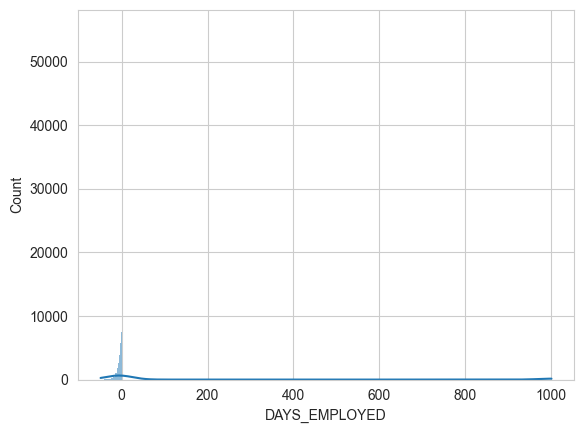

In [13]:
ax = sns.histplot(df_train.DAYS_EMPLOYED.div(365), kde=True)

In [14]:
anom = df_train[df_train['DAYS_EMPLOYED'] == 365243]
not_anom = df_train[df_train['DAYS_EMPLOYED'] != 365243]
print(f"Anomalies non-default percentage: {100 * not_anom['TARGET'].mean()}%")
print(f"Anomalies default percentage: {100 * anom['TARGET'].mean()}%")

Anomalies non-default percentage: 8.65997453765215%
Anomalies default percentage: 5.399646043269405%


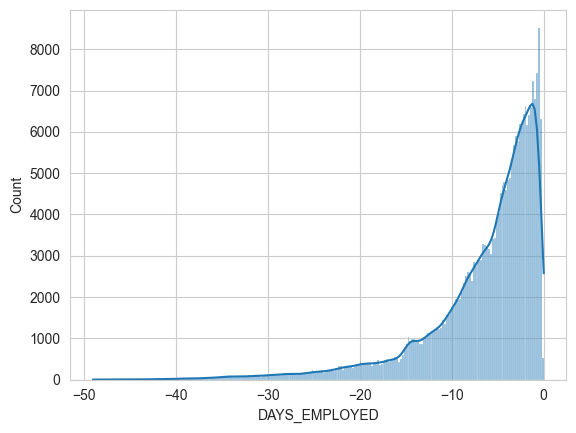

In [15]:
df_train['DAYS_EMPLOYED_ANOM'] = df_train["DAYS_EMPLOYED"] == 365243
df_train['DAYS_EMPLOYED'].replace({365243: np.nan}, inplace = True)

ax = sns.histplot(df_train.DAYS_EMPLOYED.div(365), kde=True)

In [16]:
correlations = df_train.corr()['TARGET'].sort_values(ascending=True)

In [17]:
print(correlations.head(15))

EXT_SOURCE_3                           -0.178919
EXT_SOURCE_2                           -0.160472
EXT_SOURCE_1                           -0.155317
NAME_EDUCATION_TYPE_Higher education   -0.056593
CODE_GENDER_F                          -0.054704
NAME_INCOME_TYPE_Pensioner             -0.046209
DAYS_EMPLOYED_ANOM                     -0.045987
ORGANIZATION_TYPE_XNA                  -0.045987
FLOORSMAX_AVG                          -0.044003
FLOORSMAX_MEDI                         -0.043768
FLOORSMAX_MODE                         -0.043226
EMERGENCYSTATE_MODE_No                 -0.042201
HOUSETYPE_MODE_block of flats          -0.040594
AMT_GOODS_PRICE                        -0.039645
REGION_POPULATION_RELATIVE             -0.037227
Name: TARGET, dtype: float64


In [18]:
df_train['DAYS_BIRTH'] = abs(df_train['DAYS_BIRTH'])
df_train['DAYS_BIRTH'].corr(df_train['TARGET'])

-0.07823930830982712

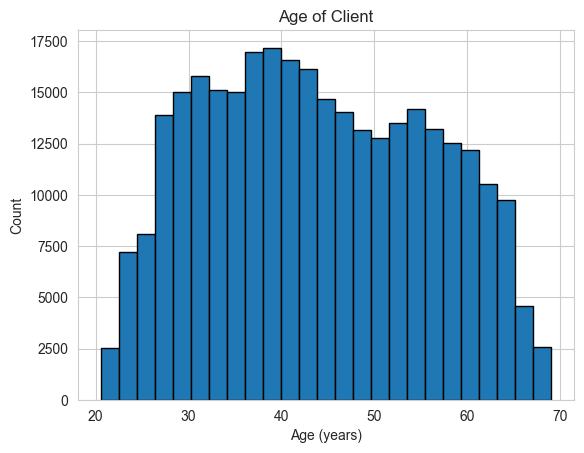

In [19]:
plt.hist(df_train.DAYS_BIRTH / 365, edgecolor = 'k', bins = 25)
plt.title('Age of Client'); plt.xlabel('Age (years)'); plt.ylabel('Count');

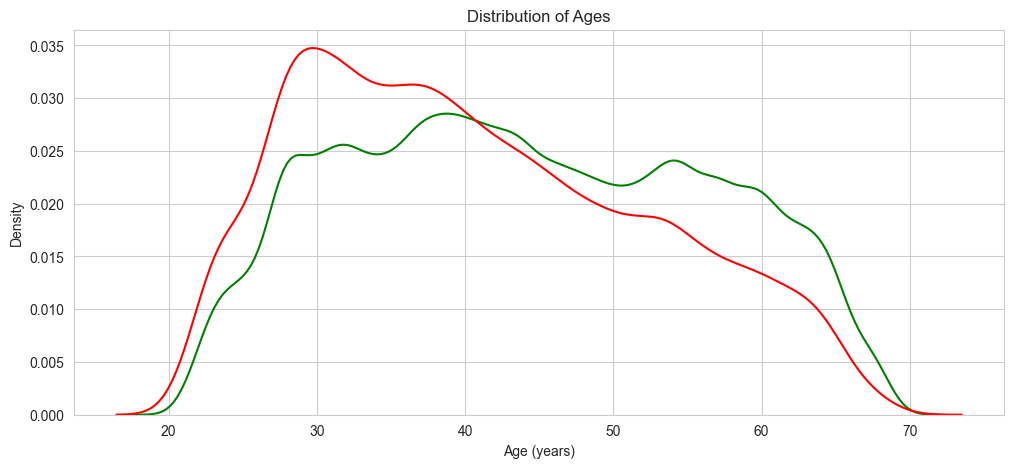

In [20]:
ax, fig = plt.subplots(figsize=(12,5))
ax = sns.kdeplot(df_train.loc[df_train['TARGET'] == 0, 'DAYS_BIRTH'] / 365, color='g')
ax = sns.kdeplot(df_train.loc[df_train['TARGET'] == 1, 'DAYS_BIRTH'] / 365, color='r')
plt.xlabel('Age (years)'); plt.ylabel('Density'); plt.title('Distribution of Ages');

In [21]:
age_data = df_train[['TARGET', 'DAYS_BIRTH']].copy()
age_data['YEARS_BIRTH'] = age_data.DAYS_BIRTH.div(365)
age_data['YEARS_BINNED'] = pd.cut(age_data.YEARS_BIRTH, bins = np.linspace(20, 70, num = 11))
age_groups = age_data.groupby('YEARS_BINNED').mean()
age_data.head(10)

,TARGET,DAYS_BIRTH,YEARS_BIRTH,YEARS_BINNED
0,1,9461,25.920548,"(25.0, 30.0]"
1,0,16765,45.931507,"(45.0, 50.0]"
2,0,19046,52.180822,"(50.0, 55.0]"
3,0,19005,52.068493,"(50.0, 55.0]"
4,0,19932,54.608219,"(50.0, 55.0]"
5,0,16941,46.413699,"(45.0, 50.0]"
6,0,13778,37.747945,"(35.0, 40.0]"
7,0,18850,51.643836,"(50.0, 55.0]"
8,0,20099,55.065753,"(55.0, 60.0]"
9,0,14469,39.641096,"(35.0, 40.0]"


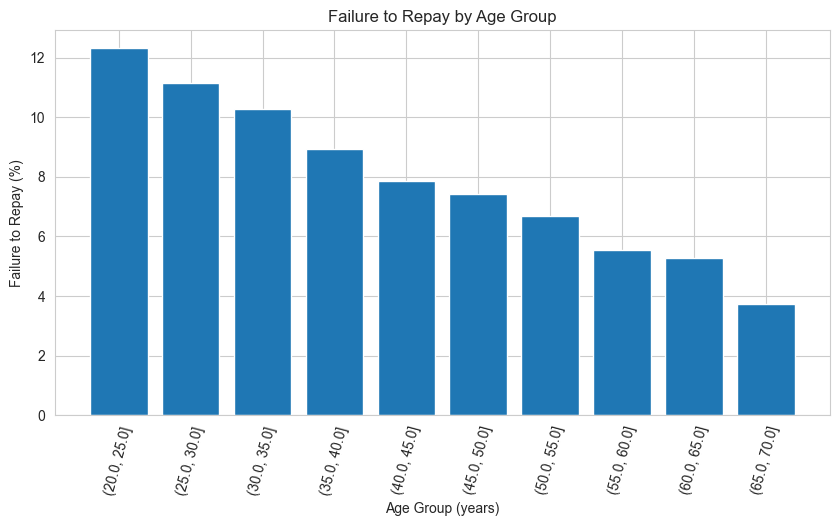

In [22]:
plt.figure(figsize = (10, 5))

# Graph the age bins and the average of the target as a bar plot
plt.bar(age_groups.index.astype(str), 100 * age_groups['TARGET'])

# Plot labeling
plt.xticks(rotation = 75); plt.xlabel('Age Group (years)'); plt.ylabel('Failure to Repay (%)')
plt.title('Failure to Repay by Age Group');

In [23]:
# Extract the EXT_SOURCE variables and show correlations
ext_data = df_train[['TARGET', 'EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'DAYS_BIRTH']]
ext_data_corrs = ext_data.corr()
ext_data_corrs.head()

,TARGET,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,DAYS_BIRTH
TARGET,1.000000,-0.155317,-0.160472,-0.178919,-0.078239
EXT_SOURCE_1,-0.155317,1.000000,0.213982,0.186846,0.600610
EXT_SOURCE_2,-0.160472,0.213982,1.000000,0.109167,0.091996
EXT_SOURCE_3,-0.178919,0.186846,0.109167,1.000000,0.205478
DAYS_BIRTH,-0.078239,0.600610,0.091996,0.205478,1.000000


<Axes: >

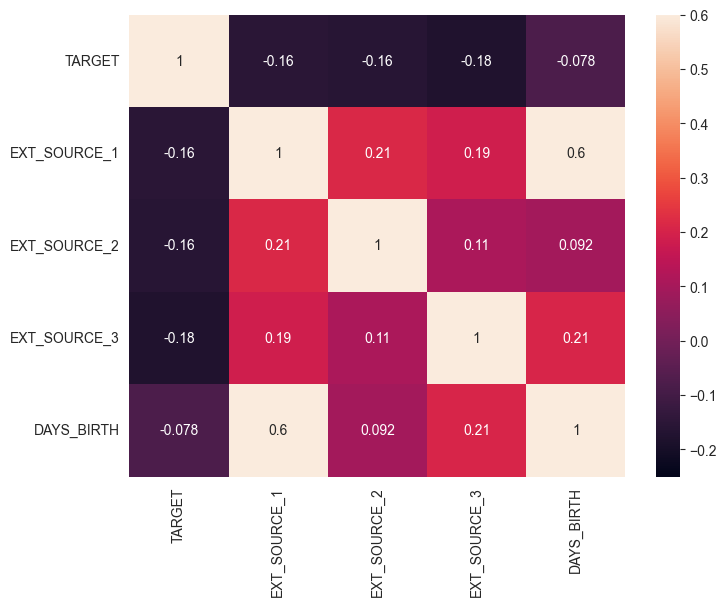

In [24]:
plt.figure(figsize = (8, 6))

# Heatmap of correlations
sns.heatmap(ext_data_corrs, vmin = -0.25, annot = True, vmax = 0.6)

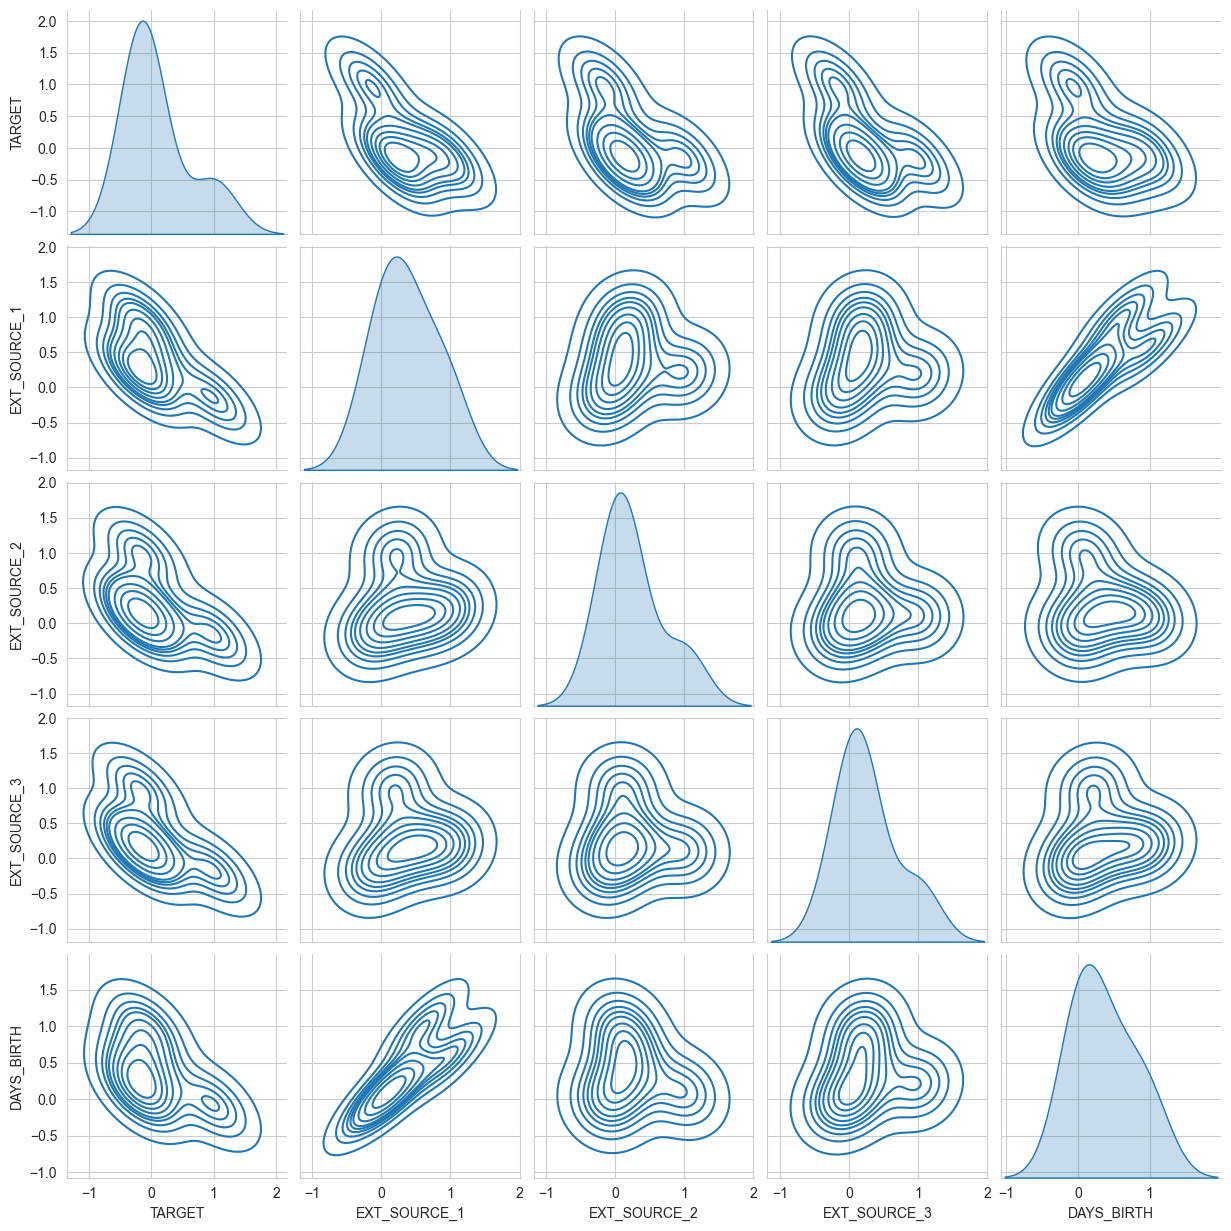

In [25]:
sns.pairplot(ext_data_corrs, kind="kde")

## Prediction

In [26]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import roc_curve

In [27]:
def random_forest(n_estimators, max_depth, X_train, X_test, y_train):
    random_forest = RandomForestClassifier(n_estimators=n_estimators,
                                           random_state=42,
                                           verbose=1,
                                           n_jobs=-1,
                                           max_depth=max_depth,
                                           class_weight = "balanced")
    
    random_forest.fit(X_train, y_train)
    predictions = random_forest.predict_proba(X_test)[:, 1]
    return predictions

In [28]:
features = list(df_train.drop(columns='TARGET').columns)
X = df_train[features]
y = df_train.TARGET

scaler = MinMaxScaler(feature_range = (0, 1))
scaler.fit(X)
X = scaler.transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.25,
                                                    random_state=42,
                                                    shuffle=True)

# Imputer from missing values
imputer = SimpleImputer(strategy = 'median')
imputer.fit(X_train)

X_train = imputer.transform(X_train)
X_test = imputer.transform(X_test)

In [29]:
l_estimators = [100, 1000, 5000]
l_depth = [100]

print(len(l_estimators), len(l_depth))

3 1


In [30]:
d_predictions = {}

for n_estimators in l_estimators:
    for max_depth in l_depth:
        predictions = random_forest(n_estimators, max_depth, X_train, X_test, y_train);
        d_predictions[f"es{n_estimators}_de{max_depth}"] = predictions

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 20 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    2.1s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:   10.6s finished
[Parallel(n_jobs=20)]: Using backend ThreadingBackend with 20 concurrent workers.
[Parallel(n_jobs=20)]: Done  10 tasks      | elapsed:    0.0s
[Parallel(n_jobs=20)]: Done 100 out of 100 | elapsed:    0.2s finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 20 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    2.0s
[Parallel(n_jobs=-1)]: Done 160 tasks      | elapsed:   17.0s
[Parallel(n_jobs=-1)]: Done 410 tasks      | elapsed:   44.0s
[Parallel(n_jobs=-1)]: Done 760 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done 1000 out of 1000 | elapsed:  1.8min finished
[Parallel(n_jobs=20)]: Using backend ThreadingBackend with 20 concurrent workers.
[Parallel(n_jobs=20)]: Done  10 tasks      | elapsed:    0.0s
[Parallel(n_jobs=20)]: 

In [31]:
def plot_roc(y_test, predictions):
    fig, ax = plt.subplots(figsize=(10, 10))
    legends = []
    for pred in predictions:
        fpr, tpr, thresholds = roc_curve(y_test, predictions[pred])
        ax = plt.plot(fpr, tpr)
        legends.append(pred)
    ax = plt.legend(labels=legends)
    ax = plt.plot([0, 1], [0, 1], 'k--')
    
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.show()

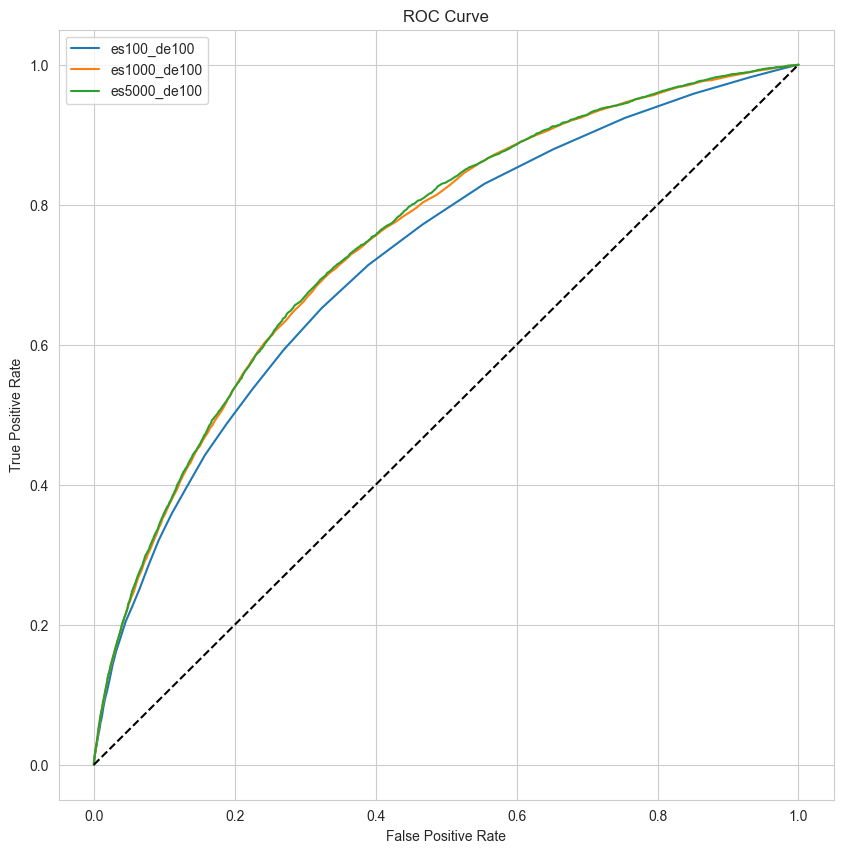

In [32]:
plot_roc(y_test, d_predictions)

In [33]:
def plot_feature_importances(df):
    # Sort features according to importance
    df = df.sort_values('importance', ascending = False).reset_index()
    
    # Normalize the feature importances to add up to one
    df['importance_normalized'] = df['importance'] / df['importance'].sum()

    # Make a horizontal bar chart of feature importances
    plt.figure(figsize = (10, 6))
    ax = plt.subplot()
    
    # Need to reverse the index to plot most important on top
    ax.barh(list(reversed(list(df.index[:15]))), 
            df['importance_normalized'].head(15), 
            align = 'center', edgecolor = 'k')
    
    # Set the yticks and labels
    ax.set_yticks(list(reversed(list(df.index[:15]))))
    ax.set_yticklabels(df['feature'].head(15))
    
    # Plot labeling
    plt.xlabel('Normalized Importance'); plt.title('Feature Importances')
    plt.show()
    
    return df

In [34]:
selected_n_estimators = 100
selected_max_depth = 1000

random_forest = RandomForestClassifier(n_estimators=selected_n_estimators,
                                       random_state=42,
                                       verbose=1,
                                       n_jobs=-1,
                                       max_depth=selected_max_depth)
random_forest.fit(X_train, y_train)

feature_importance_values = random_forest.feature_importances_
feature_importances = pd.DataFrame({'feature': features, 'importance': feature_importance_values})

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 20 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    2.3s
[Parallel(n_jobs=-1)]: Done 160 tasks      | elapsed:   19.4s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:   23.7s finished


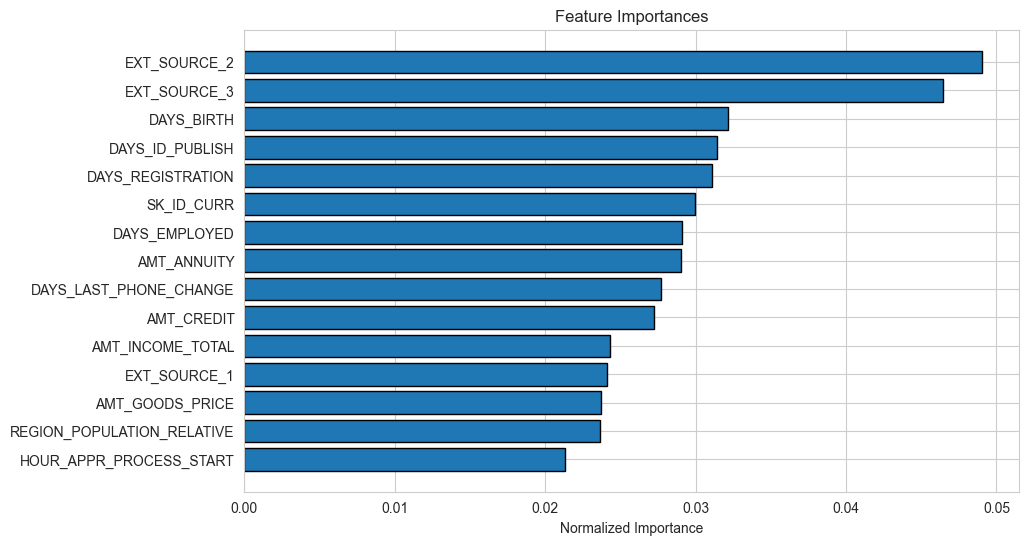

In [35]:
feature_importances_sorted = plot_feature_importances(feature_importances)